In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from utils.config import CONFIG, REQUIRED_FEATURES
import numpy as np

In [27]:
def visualize_normal_data(rpm_type='rpm_1200', model_type='vibration', downsample_rate=10):
    """
    정상 데이터 전체 시각화
    
    Parameters:
        rpm_type: 'rpm_1200' 또는 'rpm_600'
        model_type: 'vibration', 'voltage', 'temperature' 등
        downsample_rate: 데이터 다운샘플링 비율 (기본값: 10)
    """
    # 설정 불러오기
    rpm_config = CONFIG[rpm_type]
    train_dir = rpm_config['train_data_dir']
    
    # 특징 선택
    features = REQUIRED_FEATURES[model_type]
    if isinstance(features, str):
        features = [features]
        
    plt.style.use('seaborn')
    
    # 각 세션 파일에 대해 처리
    for file_name in os.listdir(train_dir):
        if file_name.endswith('.csv'):
            file_path = os.path.join(train_dir, file_name)
            print(f"\n처리 중인 파일: {file_name}")
            
            # 데이터 로드
            df = pd.read_csv(file_path)
            
            # 다운샘플링
            df_downsampled = df.iloc[::downsample_rate]
            
            if len(features) > 1:  # 다중 특징 (예: vibration)
                fig, axes = plt.subplots(len(features), 1, figsize=(15, 5*len(features)))
                fig.suptitle(f'Normal Data Visualization - {file_name}\n({rpm_type}, {model_type})')
                
                for ax, feature in zip(axes, features):
                    ax.plot(df_downsampled.index, df_downsampled[feature], 
                           'b-', linewidth=0.5, label=feature)
                    ax.set_title(feature)
                    ax.legend()
                    ax.grid(True)
                    
                    # 기본 통계 추가
                    mean_val = df[feature].mean()
                    std_val = df[feature].std()
                    ax.axhline(y=mean_val, color='r', linestyle='--', alpha=0.5)
                    ax.axhline(y=mean_val + 2*std_val, color='g', linestyle='--', alpha=0.3)
                    ax.axhline(y=mean_val - 2*std_val, color='g', linestyle='--', alpha=0.3)
                    
                    # 통계값 텍스트 추가
                    stats_text = f'Mean: {mean_val:.3f}\nStd: {std_val:.3f}'
                    ax.text(0.02, 0.98, stats_text, transform=ax.transAxes, 
                           verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
                    
            else:  # 단일 특징 (예: voltage, temperature)
                feature = features[0]
                plt.figure(figsize=(15, 5))
                plt.plot(df_downsampled.index, df_downsampled[feature], 
                        'b-', linewidth=0.5, label=feature)
                plt.title(f'Normal Data Visualization - {file_name}\n({rpm_type}, {model_type})')
                plt.legend()
                plt.grid(True)
                
                # 기본 통계 추가
                mean_val = df[feature].mean()
                std_val = df[feature].std()
                plt.axhline(y=mean_val, color='r', linestyle='--', alpha=0.5, label='Mean')
                plt.axhline(y=mean_val + 2*std_val, color='g', linestyle='--', alpha=0.3, label='±2σ')
                plt.axhline(y=mean_val - 2*std_val, color='g', linestyle='--', alpha=0.3)
                
                # 통계값 텍스트 추가
                stats_text = f'Mean: {mean_val:.3f}\nStd: {std_val:.3f}'
                plt.text(0.02, 0.98, stats_text, transform=plt.gca().transAxes, 
                        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
            
            plt.tight_layout()
            plt.show()
            
            # 기본 통계 출력
            print("\n기본 통계:")
            for feature in features:
                print(f"\n{feature}:")
                print(df[feature].describe())

In [28]:
def visualize_full_data(rpm_type='rpm_1200', model_type='vibration'):
    """
    전체 데이터를 다운샘플링 없이 시각화
    """
    rpm_config = CONFIG[rpm_type]
    train_dir = rpm_config['raw_data_dir']
    
    features = REQUIRED_FEATURES[model_type]
    if isinstance(features, str):
        features = [features]
        
    plt.style.use('seaborn')
    
    for file_name in os.listdir(train_dir):
        if file_name.endswith('.csv'):
            print(f"\n처리 중인 파일: {file_name}")
            
            # 데이터 로드
            df = pd.read_csv(os.path.join(train_dir, file_name))
            
            # 전체 데이터 포인트 수 출력
            print(f"데이터 포인트 수: {len(df)}")
            
            if len(features) > 1:
                fig, axes = plt.subplots(len(features), 1, figsize=(20, 5*len(features)), dpi=100)
                fig.suptitle(f'Full Data Visualization - {file_name}\n({rpm_type}, {model_type})')
                
                for ax, feature in zip(axes, features):
                    # 모든 데이터 포인트 플롯
                    ax.plot(df.index, df[feature], 'b-', linewidth=0.1, alpha=0.7, label=feature)
                    
                    # 기본 통계 추가
                    mean_val = df[feature].mean()
                    std_val = df[feature].std()
                    ax.axhline(y=mean_val, color='r', linestyle='--', alpha=0.5)
                    ax.axhline(y=mean_val + 2*std_val, color='g', linestyle='--', alpha=0.3)
                    ax.axhline(y=mean_val - 2*std_val, color='g', linestyle='--', alpha=0.3)
                    
                    stats_text = f'Mean: {mean_val:.3f}\nStd: {std_val:.3f}'
                    ax.text(0.02, 0.98, stats_text, transform=ax.transAxes,
                            verticalalignment='top',
                            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
                    
                    ax.set_title(feature)
                    ax.legend()
                    ax.grid(True)
            
            plt.tight_layout()
            plt.show()

In [29]:
def visualize_full_data_optimized(rpm_type='rpm_1200', model_type='vibration'):
    """
    최적화된 전체 데이터 시각화
    """
    # 설정 불러오기
    rpm_config = CONFIG[rpm_type]
    train_dir = rpm_config['raw_data_train_dir']
    
    # 특징 선택
    features = REQUIRED_FEATURES[model_type]
    if isinstance(features, str):
        features = [features]
    
    plt.style.use('fast')
    
    for file_name in os.listdir(train_dir):
        if file_name.endswith('.csv'):
            print(f"\n처리 중인 파일: {file_name}")
            
            # 데이터 로드
            df = pd.read_csv(os.path.join(train_dir, file_name))
            print(f"데이터 포인트 수: {len(df)}")
            
            with plt.style.context('fast'):
                if len(features) > 1:  # 다중 특징 (예: vibration)
                    fig, axes = plt.subplots(len(features), 1, 
                                           figsize=(20, 5*len(features)), 
                                           dpi=100,
                                           facecolor='white')
                    
                    # axes가 단일 subplot일 경우 리스트로 변환
                    if len(features) == 1:
                        axes = [axes]
                    
                    fig.suptitle(f'Full Data Visualization - {file_name}\n({rpm_type}, {model_type})',
                                fontsize=12, y=0.95)
                    
                    for ax, feature in zip(axes, features):
                        # 데이터 플롯
                        ax.plot(df.index, df[feature], 
                               color='blue',
                               linewidth=0.1, 
                               alpha=0.7,
                               label=feature, 
                               rasterized=True)
                        
                        # 통계값 계산
                        mean_val = df[feature].mean()
                        std_val = df[feature].std()
                        
                        # 평균선과 표준편차 범위
                        ax.axhline(y=mean_val, color='red', 
                                 linestyle='--', 
                                 alpha=0.5,
                                 label='Mean')
                        ax.axhline(y=mean_val + 2*std_val, 
                                 color='green', 
                                 linestyle='--', 
                                 alpha=0.3,
                                 label='±2σ')
                        ax.axhline(y=mean_val - 2*std_val, 
                                 color='green', 
                                 linestyle='--', 
                                 alpha=0.3)
                        
                        # 통계 정보 텍스트
                        stats_text = f'Mean: {mean_val:.3f}\nStd: {std_val:.3f}'
                        ax.text(0.02, 0.98, stats_text,
                               transform=ax.transAxes,
                               verticalalignment='top',
                               horizontalalignment='left',
                               bbox=dict(boxstyle='round',
                                       facecolor='white',
                                       alpha=0.8))
                        
                        # 축 레이블과 그리드
                        ax.set_title(feature, fontsize=10, pad=5)
                        ax.set_xlabel('Data Points', fontsize=8)
                        ax.set_ylabel('Value', fontsize=8)
                        ax.tick_params(axis='both', which='major', labelsize=8)
                        ax.grid(True, alpha=0.3)
                        ax.legend(fontsize=8)
                
                else:  # 단일 특징 (예: voltage, temperature)
                    plt.figure(figsize=(20, 5), dpi=100, facecolor='white')
                    
                    feature = features[0]
                    
                    # 데이터 플롯
                    plt.plot(df.index, df[feature],
                            color='blue',
                            linewidth=0.1,
                            alpha=0.7,
                            label=feature,
                            rasterized=True)
                    
                    # 통계값 계산
                    mean_val = df[feature].mean()
                    std_val = df[feature].std()
                    
                    # 평균선과 표준편차 범위
                    plt.axhline(y=mean_val, color='red',
                              linestyle='--',
                              alpha=0.5,
                              label='Mean')
                    plt.axhline(y=mean_val + 2*std_val,
                              color='green',
                              linestyle='--',
                              alpha=0.3,
                              label='±2σ')
                    plt.axhline(y=mean_val - 2*std_val,
                              color='green',
                              linestyle='--',
                              alpha=0.3)
                    
                    # 통계 정보 텍스트
                    stats_text = f'Mean: {mean_val:.3f}\nStd: {std_val:.3f}'
                    plt.text(0.02, 0.98, stats_text,
                            transform=plt.gca().transAxes,
                            verticalalignment='top',
                            horizontalalignment='left',
                            bbox=dict(boxstyle='round',
                                    facecolor='white',
                                    alpha=0.8))
                    
                    # 그래프 제목과 레이블
                    plt.title(f'Full Data Visualization - {file_name}\n({rpm_type}, {feature})',
                             fontsize=12, pad=10)
                    plt.xlabel('Data Points', fontsize=8)
                    plt.ylabel('Value', fontsize=8)
                    plt.tick_params(axis='both', which='major', labelsize=8)
                    plt.grid(True, alpha=0.3)
                    plt.legend(fontsize=8)
                
                # 그래프 레이아웃 최적화
                plt.tight_layout()
                
                # 그래프 표시
                plt.show()
                
                # 메모리 정리
                plt.close('all')

In [30]:
def visualize_full_cleaned_data_optimized(rpm_type='rpm_1200', model_type='vibration', data_type='raw'):
    """
    최적화된 전체 데이터 시각화
    """
    # 설정 불러오기
    rpm_config = CONFIG[rpm_type]
    data_dir = ''
    if data_type == 'raw':
        data_dir = rpm_config['raw_data_train_dir']
    elif data_type == 'cleaned':
        data_dir = rpm_config['processed_train_data_dir']
    elif data_type == 'anomalous':
        data_dir = rpm_config['test_data_dir']
    else:
        data_dir = rpm_config['test_data_dir']
        
    data_dir = rpm_config['processed_train_data_dir']
    
    # 특징 선택
    features = REQUIRED_FEATURES[model_type]
    if isinstance(features, str):
        features = [features]
    
    plt.style.use('fast')
    
    for file_name in os.listdir(data_dir):
        if file_name.endswith('.csv'):
            print(f"\n처리 중인 파일: {file_name}")
            
            # 데이터 로드
            df = pd.read_csv(os.path.join(data_dir, file_name))
            print(f"데이터 포인트 수: {len(df)}")
            
            with plt.style.context('fast'):
                if len(features) > 1:  # 다중 특징 (예: vibration)
                    fig, axes = plt.subplots(len(features), 1, 
                                           figsize=(20, 5*len(features)), 
                                           dpi=100,
                                           facecolor='white')
                    
                    # axes가 단일 subplot일 경우 리스트로 변환
                    if len(features) == 1:
                        axes = [axes]
                    
                    fig.suptitle(f'Full Data Visualization - {file_name}\n({rpm_type}, {model_type})',
                                fontsize=12, y=0.95)
                    
                    for ax, feature in zip(axes, features):
                        # 데이터 플롯
                        ax.plot(df.index, df[feature], 
                               color='blue',
                               linewidth=0.1, 
                               alpha=0.7,
                               label=feature, 
                               rasterized=True)
                        
                        # 통계값 계산
                        mean_val = df[feature].mean()
                        std_val = df[feature].std()
                        
                        # 평균선과 표준편차 범위
                        ax.axhline(y=mean_val, color='red', 
                                 linestyle='--', 
                                 alpha=0.5,
                                 label='Mean')
                        ax.axhline(y=mean_val + 2*std_val, 
                                 color='green', 
                                 linestyle='--', 
                                 alpha=0.3,
                                 label='±2σ')
                        ax.axhline(y=mean_val - 2*std_val, 
                                 color='green', 
                                 linestyle='--', 
                                 alpha=0.3)
                        
                        # 통계 정보 텍스트
                        stats_text = f'Mean: {mean_val:.3f}\nStd: {std_val:.3f}'
                        ax.text(0.02, 0.98, stats_text,
                               transform=ax.transAxes,
                               verticalalignment='top',
                               horizontalalignment='left',
                               bbox=dict(boxstyle='round',
                                       facecolor='white',
                                       alpha=0.8))
                        
                        # 축 레이블과 그리드
                        ax.set_title(feature, fontsize=10, pad=5)
                        ax.set_xlabel('Data Points', fontsize=8)
                        ax.set_ylabel('Value', fontsize=8)
                        ax.tick_params(axis='both', which='major', labelsize=8)
                        ax.grid(True, alpha=0.3)
                        ax.legend(fontsize=8)
                
                else:  # 단일 특징 (예: voltage, temperature)
                    plt.figure(figsize=(20, 5), dpi=100, facecolor='white')
                    
                    feature = features[0]
                    
                    # 데이터 플롯
                    plt.plot(df.index, df[feature],
                            color='blue',
                            linewidth=0.1,
                            alpha=0.7,
                            label=feature,
                            rasterized=True)
                    
                    # 통계값 계산
                    mean_val = df[feature].mean()
                    std_val = df[feature].std()
                    
                    # 평균선과 표준편차 범위
                    plt.axhline(y=mean_val, color='red',
                              linestyle='--',
                              alpha=0.5,
                              label='Mean')
                    plt.axhline(y=mean_val + 2*std_val,
                              color='green',
                              linestyle='--',
                              alpha=0.3,
                              label='±2σ')
                    plt.axhline(y=mean_val - 2*std_val,
                              color='green',
                              linestyle='--',
                              alpha=0.3)
                    
                    # 통계 정보 텍스트
                    stats_text = f'Mean: {mean_val:.3f}\nStd: {std_val:.3f}'
                    plt.text(0.02, 0.98, stats_text,
                            transform=plt.gca().transAxes,
                            verticalalignment='top',
                            horizontalalignment='left',
                            bbox=dict(boxstyle='round',
                                    facecolor='white',
                                    alpha=0.8))
                    
                    # 그래프 제목과 레이블
                    plt.title(f'Full Data Visualization - {file_name}\n({rpm_type}, {feature})',
                             fontsize=12, pad=10)
                    plt.xlabel('Data Points', fontsize=8)
                    plt.ylabel('Value', fontsize=8)
                    plt.tick_params(axis='both', which='major', labelsize=8)
                    plt.grid(True, alpha=0.3)
                    plt.legend(fontsize=8)
                
                # 그래프 레이아웃 최적화
                plt.tight_layout()
                
                # 그래프 표시
                plt.show()
                
                # 메모리 정리
                plt.close('all')

# 1. 다운 샘플링

/tmp/ipykernel_67496/2059553719.py:19: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')



처리 중인 파일: cleaned_1200-3.csv


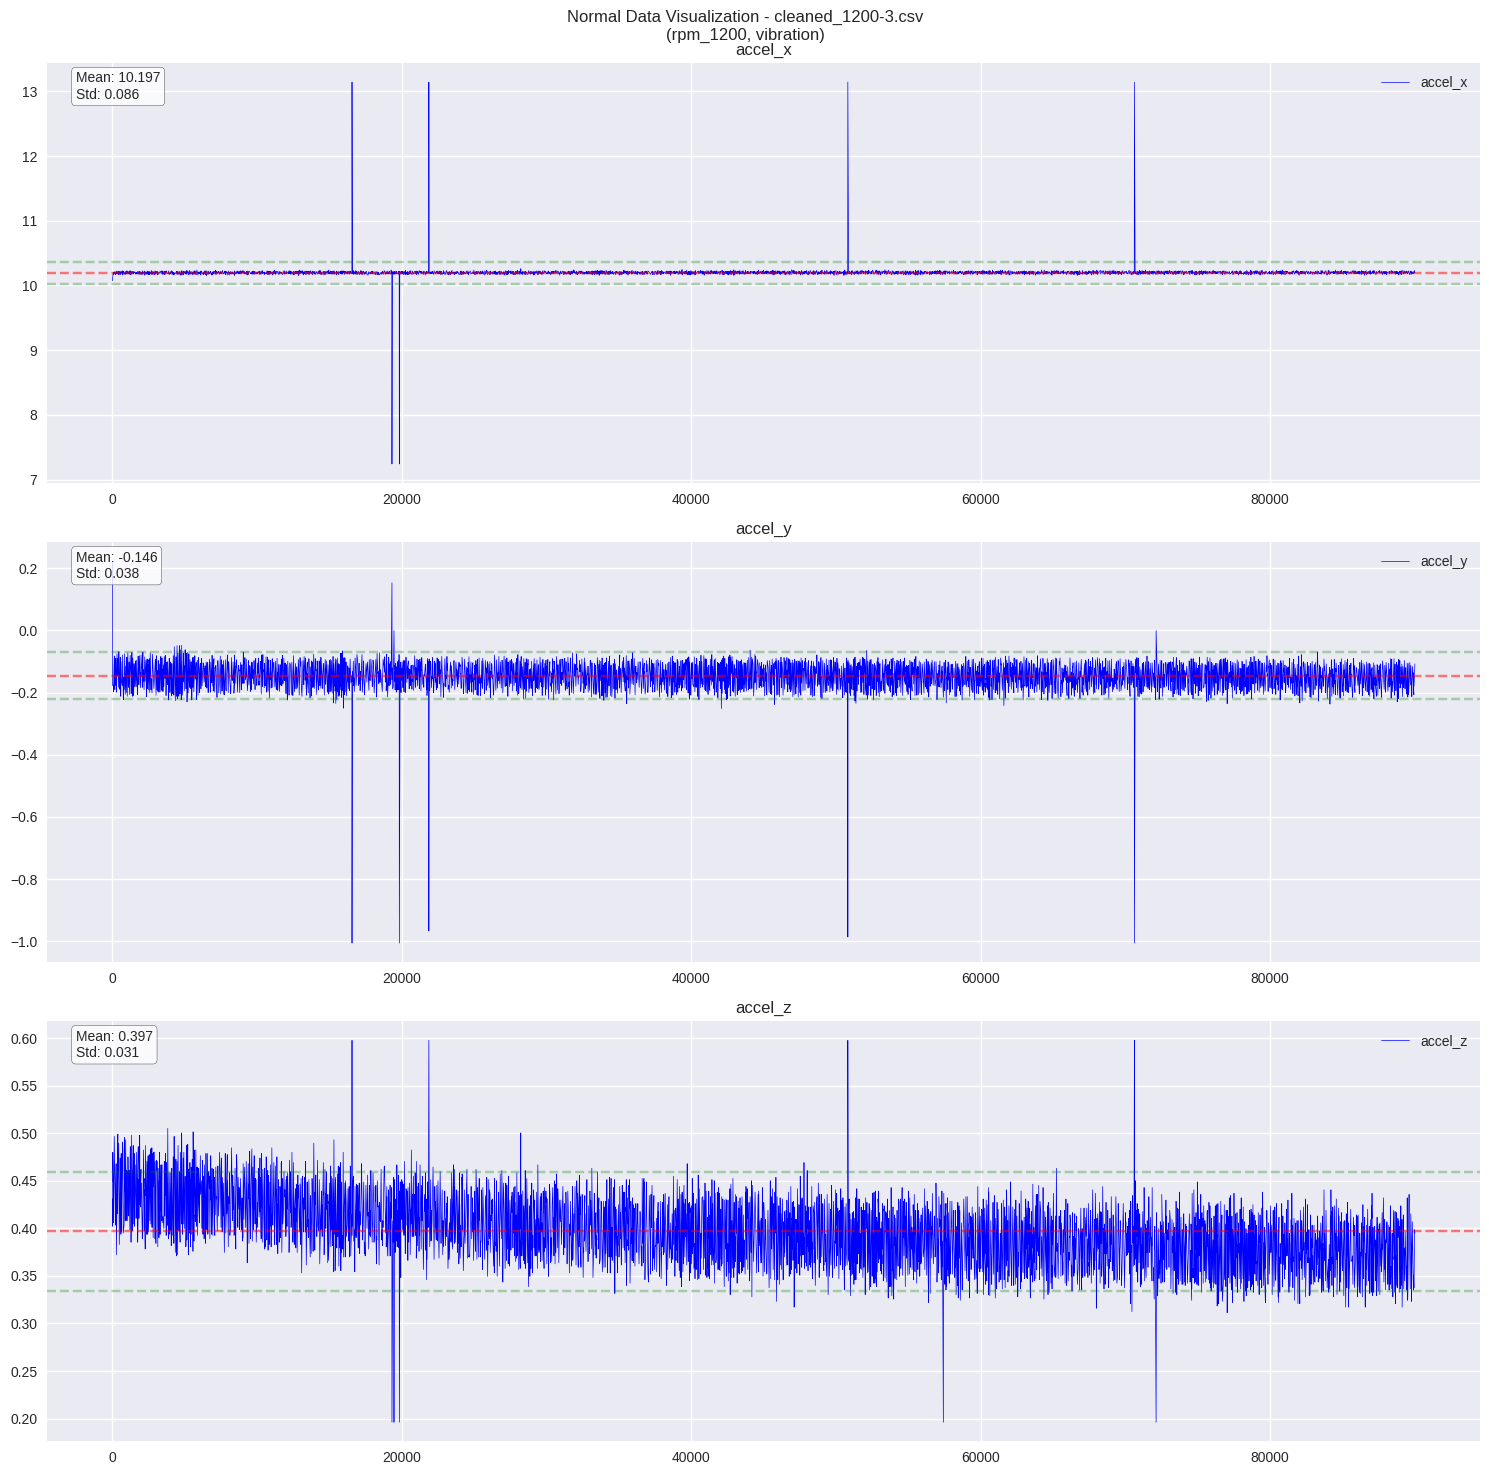


기본 통계:

accel_x:
count    90001.000000
mean        10.196725
std          0.086032
min          7.241015
25%         10.188530
50%         10.198100
75%         10.208880
max         13.142786
Name: accel_x, dtype: float64

accel_y:
count    90001.000000
mean        -0.145943
std          0.037866
min         -1.006076
25%         -0.168791
50%         -0.146046
75%         -0.120907
max          0.704375
Name: accel_y, dtype: float64

accel_z:
count    90001.000000
mean         0.396948
std          0.031276
min          0.196211
25%          0.374693
50%          0.396240
75%          0.417788
max          0.597788
Name: accel_z, dtype: float64

처리 중인 파일: cleaned_1200-1.csv


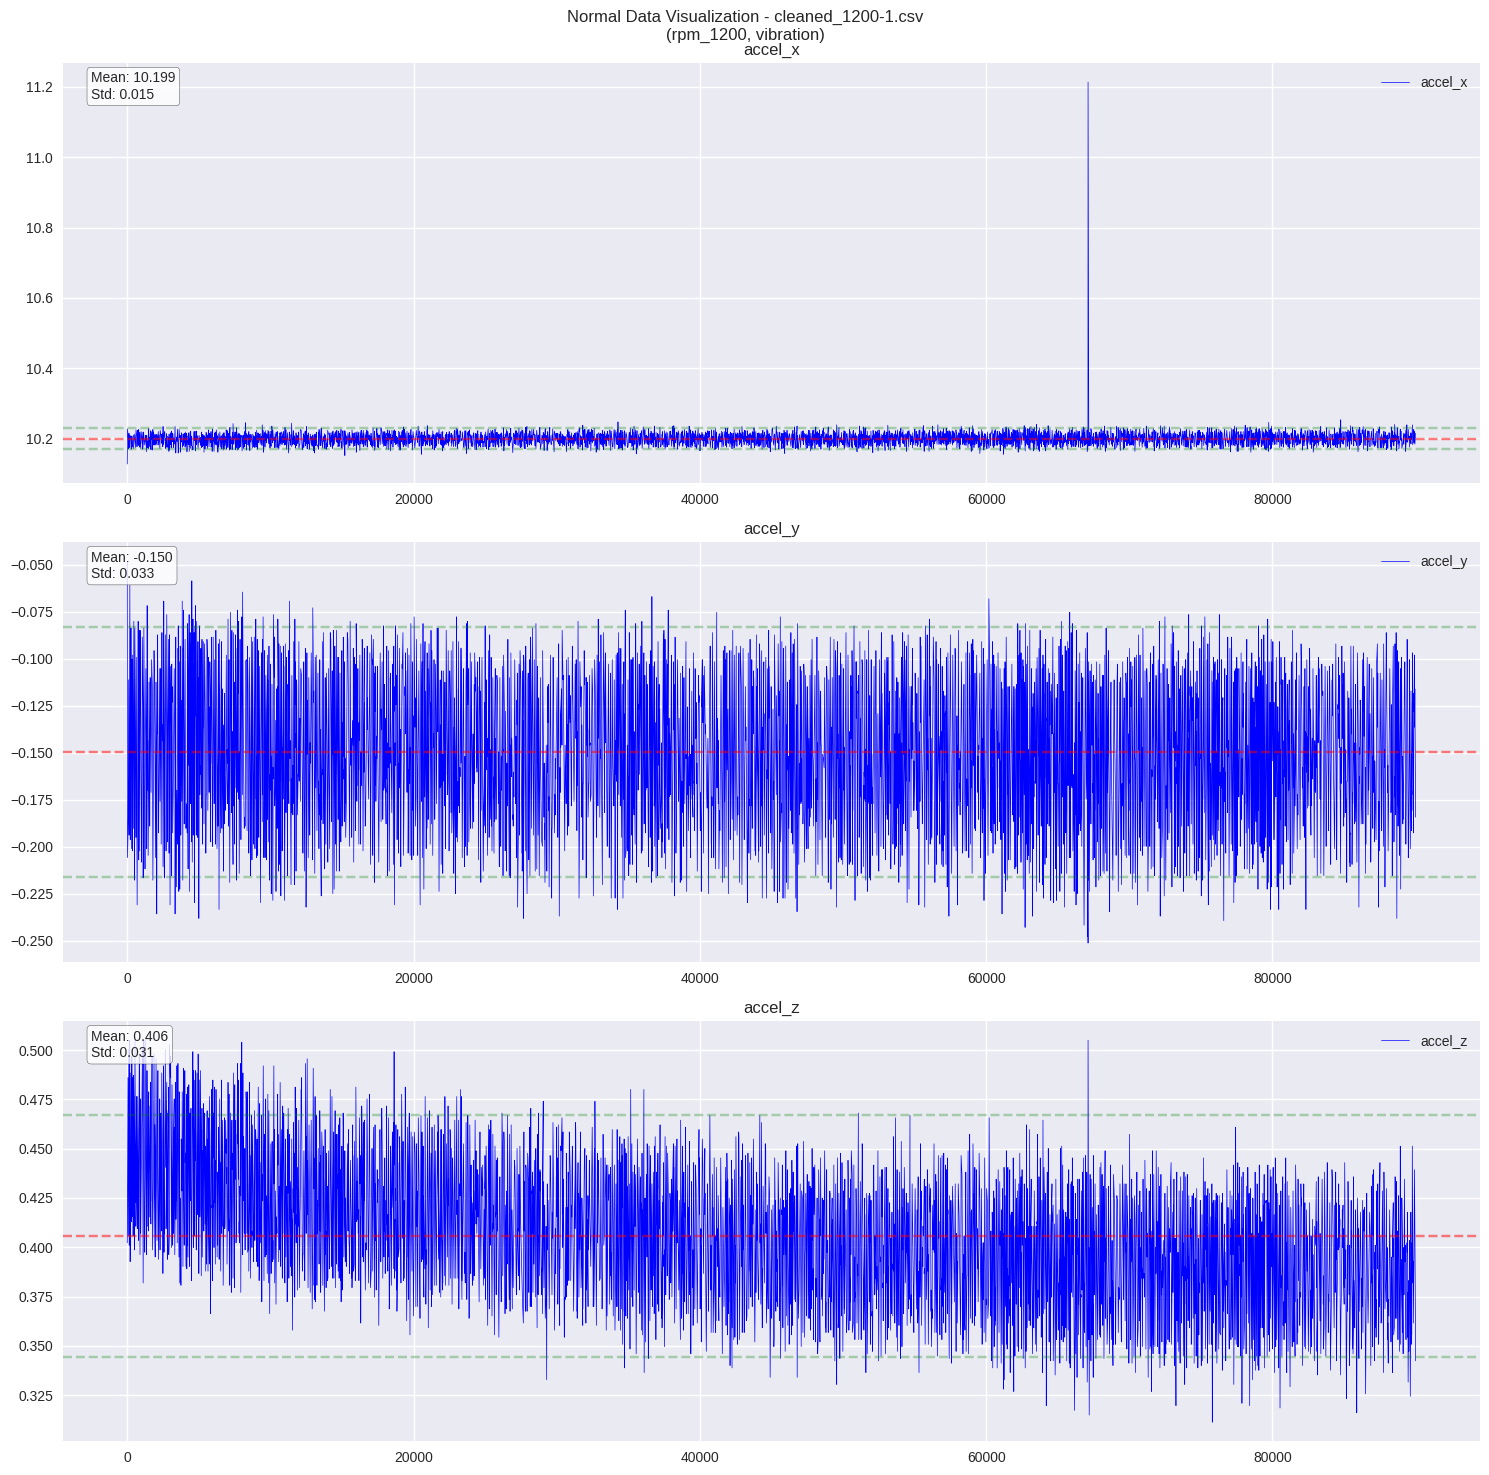


기본 통계:

accel_x:
count    90001.000000
mean        10.198968
std          0.014901
min          9.187173
25%         10.189720
50%         10.199300
75%         10.207680
max         11.213773
Name: accel_x, dtype: float64

accel_y:
count    90001.000000
mean        -0.149760
std          0.033311
min         -0.251340
25%         -0.173580
50%         -0.152032
75%         -0.123301
max         -0.048225
Name: accel_y, dtype: float64

accel_z:
count    90001.000000
mean         0.405647
std          0.030687
min          0.306440
25%          0.383072
50%          0.404620
75%          0.426168
max          0.504968
Name: accel_z, dtype: float64


In [31]:
# 진동 데이터 시각화
visualize_normal_data('rpm_1200', 'vibration', downsample_rate=10)


처리 중인 파일: cleaned_1200-3.csv


/tmp/ipykernel_67496/2059553719.py:19: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


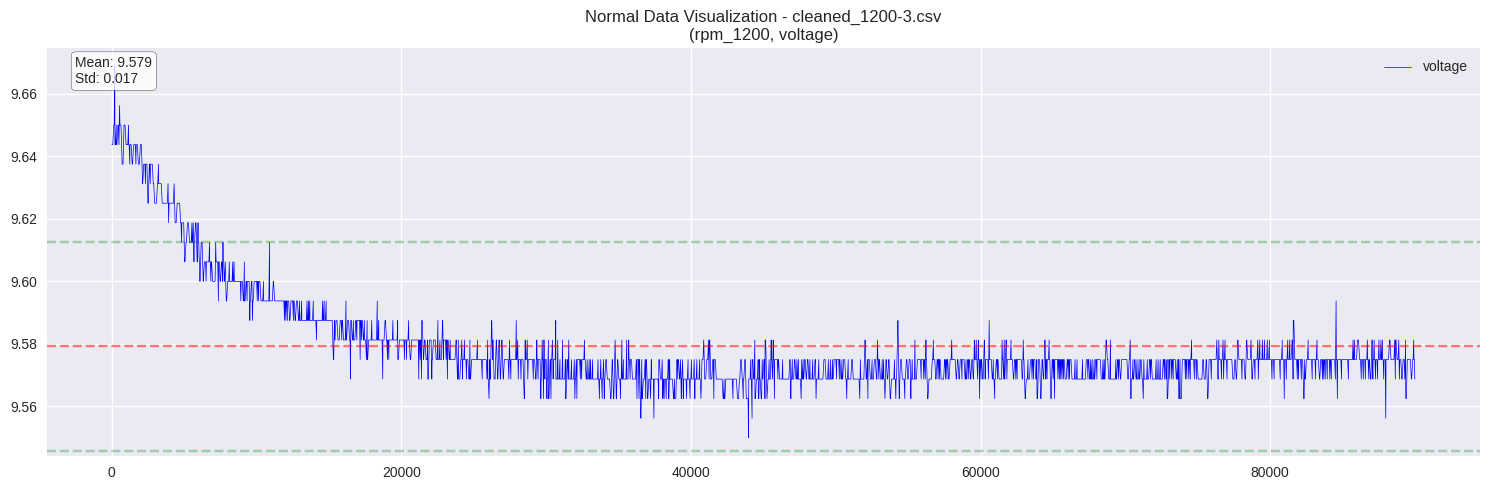


기본 통계:

voltage:
count    90001.000000
mean         9.579240
std          0.016705
min          9.550000
25%          9.568750
50%          9.575000
75%          9.581250
max          9.668750
Name: voltage, dtype: float64

처리 중인 파일: cleaned_1200-1.csv


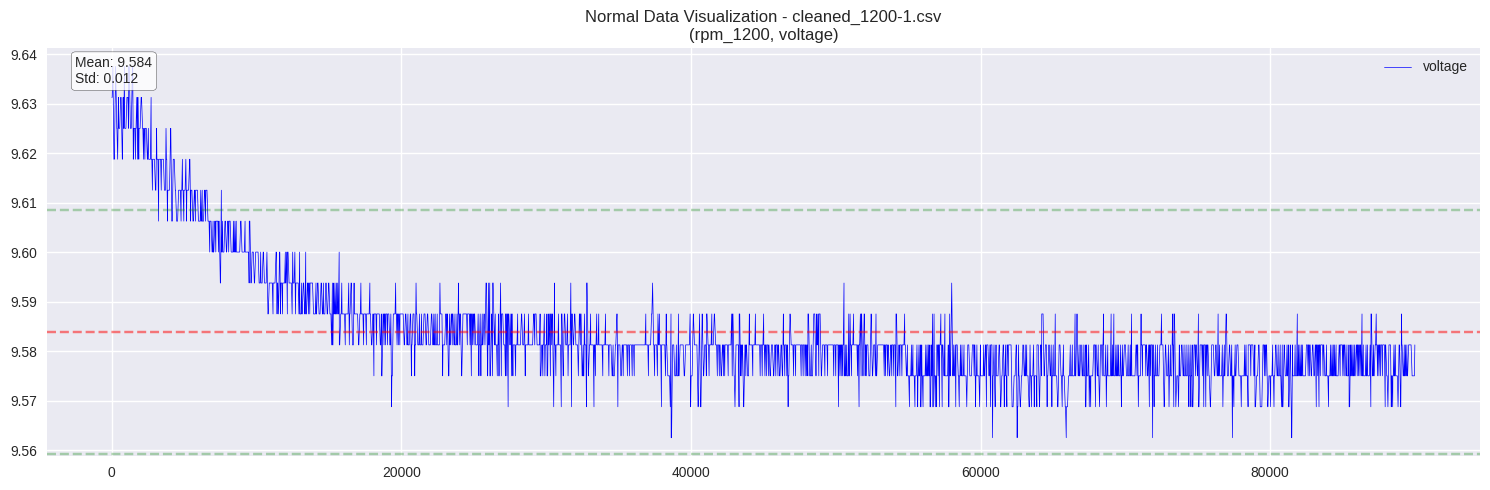


기본 통계:

voltage:
count    90001.000000
mean         9.583881
std          0.012343
min          9.562500
25%          9.575000
50%          9.581250
75%          9.587501
max          9.637500
Name: voltage, dtype: float64


In [32]:
# 전압 데이터 시각화
visualize_normal_data('rpm_1200', 'voltage', downsample_rate=10)


처리 중인 파일: cleaned_1200-3.csv


/tmp/ipykernel_67496/2059553719.py:19: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


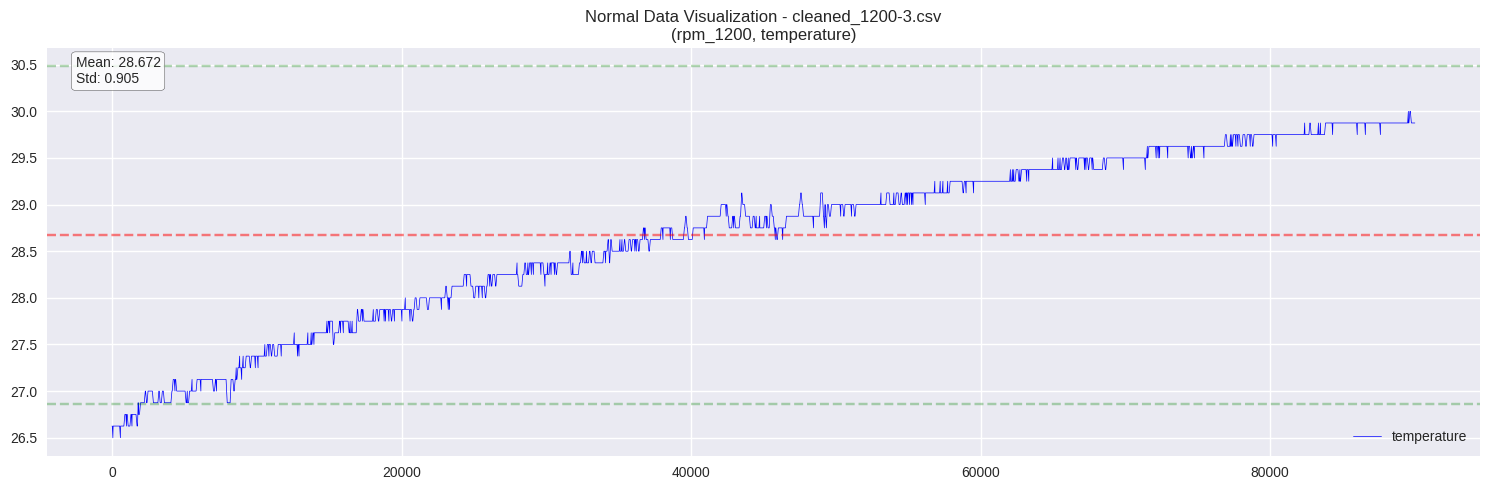


기본 통계:

temperature:
count    90001.000000
mean        28.671894
std          0.904723
min         26.500000
25%         28.000000
50%         28.875000
75%         29.500000
max         30.000000
Name: temperature, dtype: float64

처리 중인 파일: cleaned_1200-1.csv


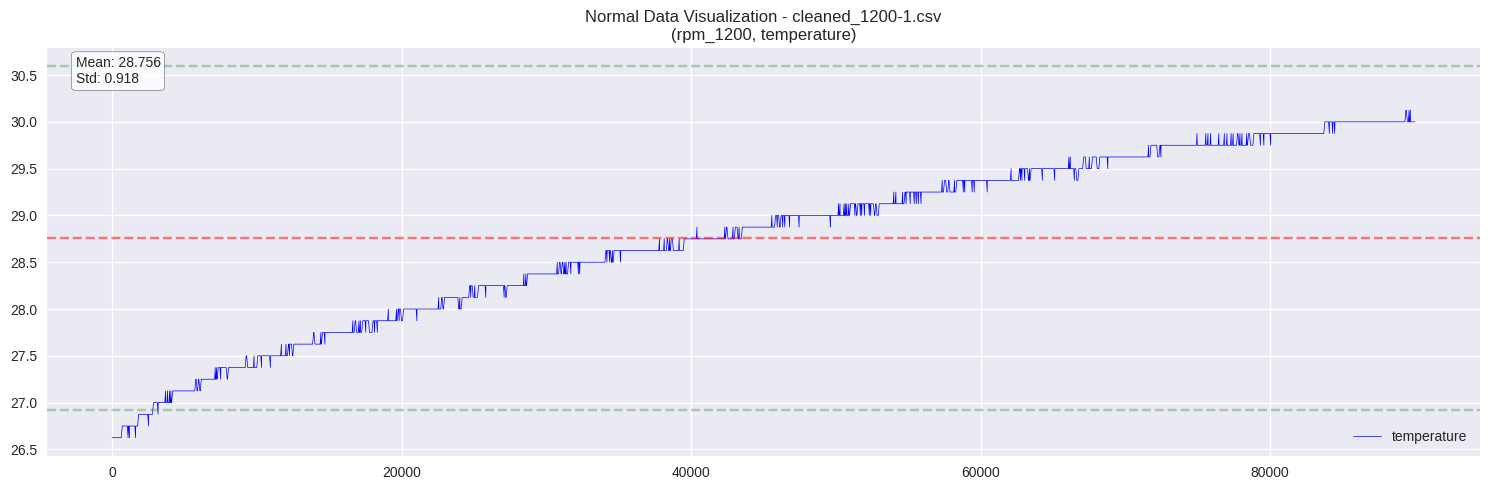


기본 통계:

temperature:
count    90001.000000
mean        28.756089
std          0.918066
min         26.625000
25%         28.000000
50%         28.875000
75%         29.500000
max         30.125000
Name: temperature, dtype: float64


In [33]:
# 온도 데이터 시각화
visualize_normal_data('rpm_1200', 'temperature', downsample_rate=10)

# 2. 전체 데이터 시각화


처리 중인 파일: 1200-3.csv
데이터 포인트 수: 90001


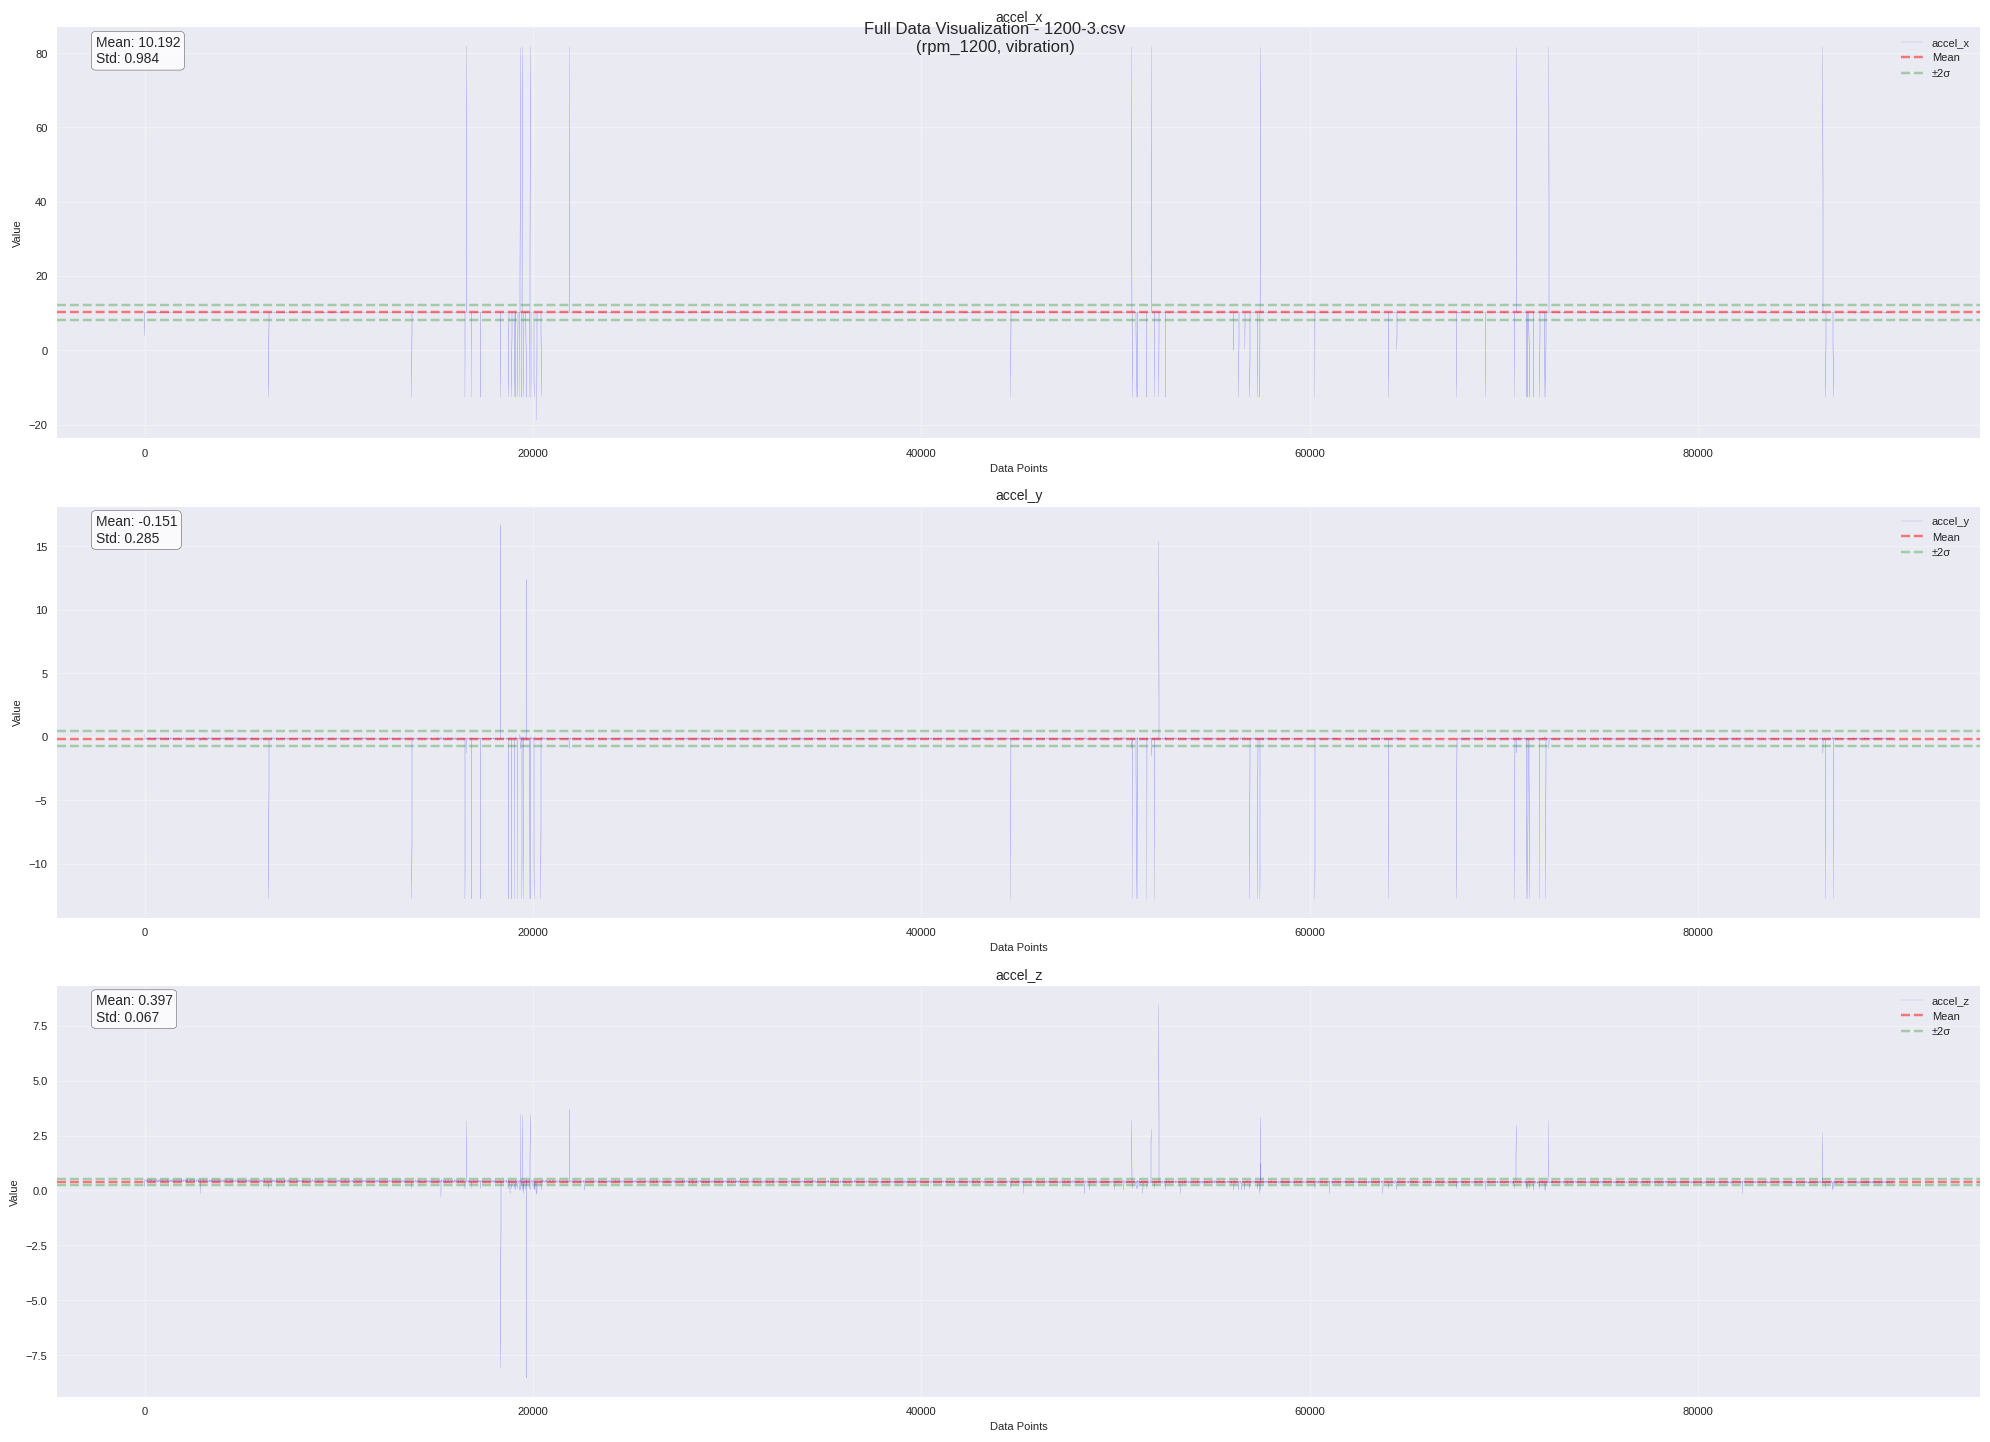


처리 중인 파일: 1200-1.csv
데이터 포인트 수: 90001


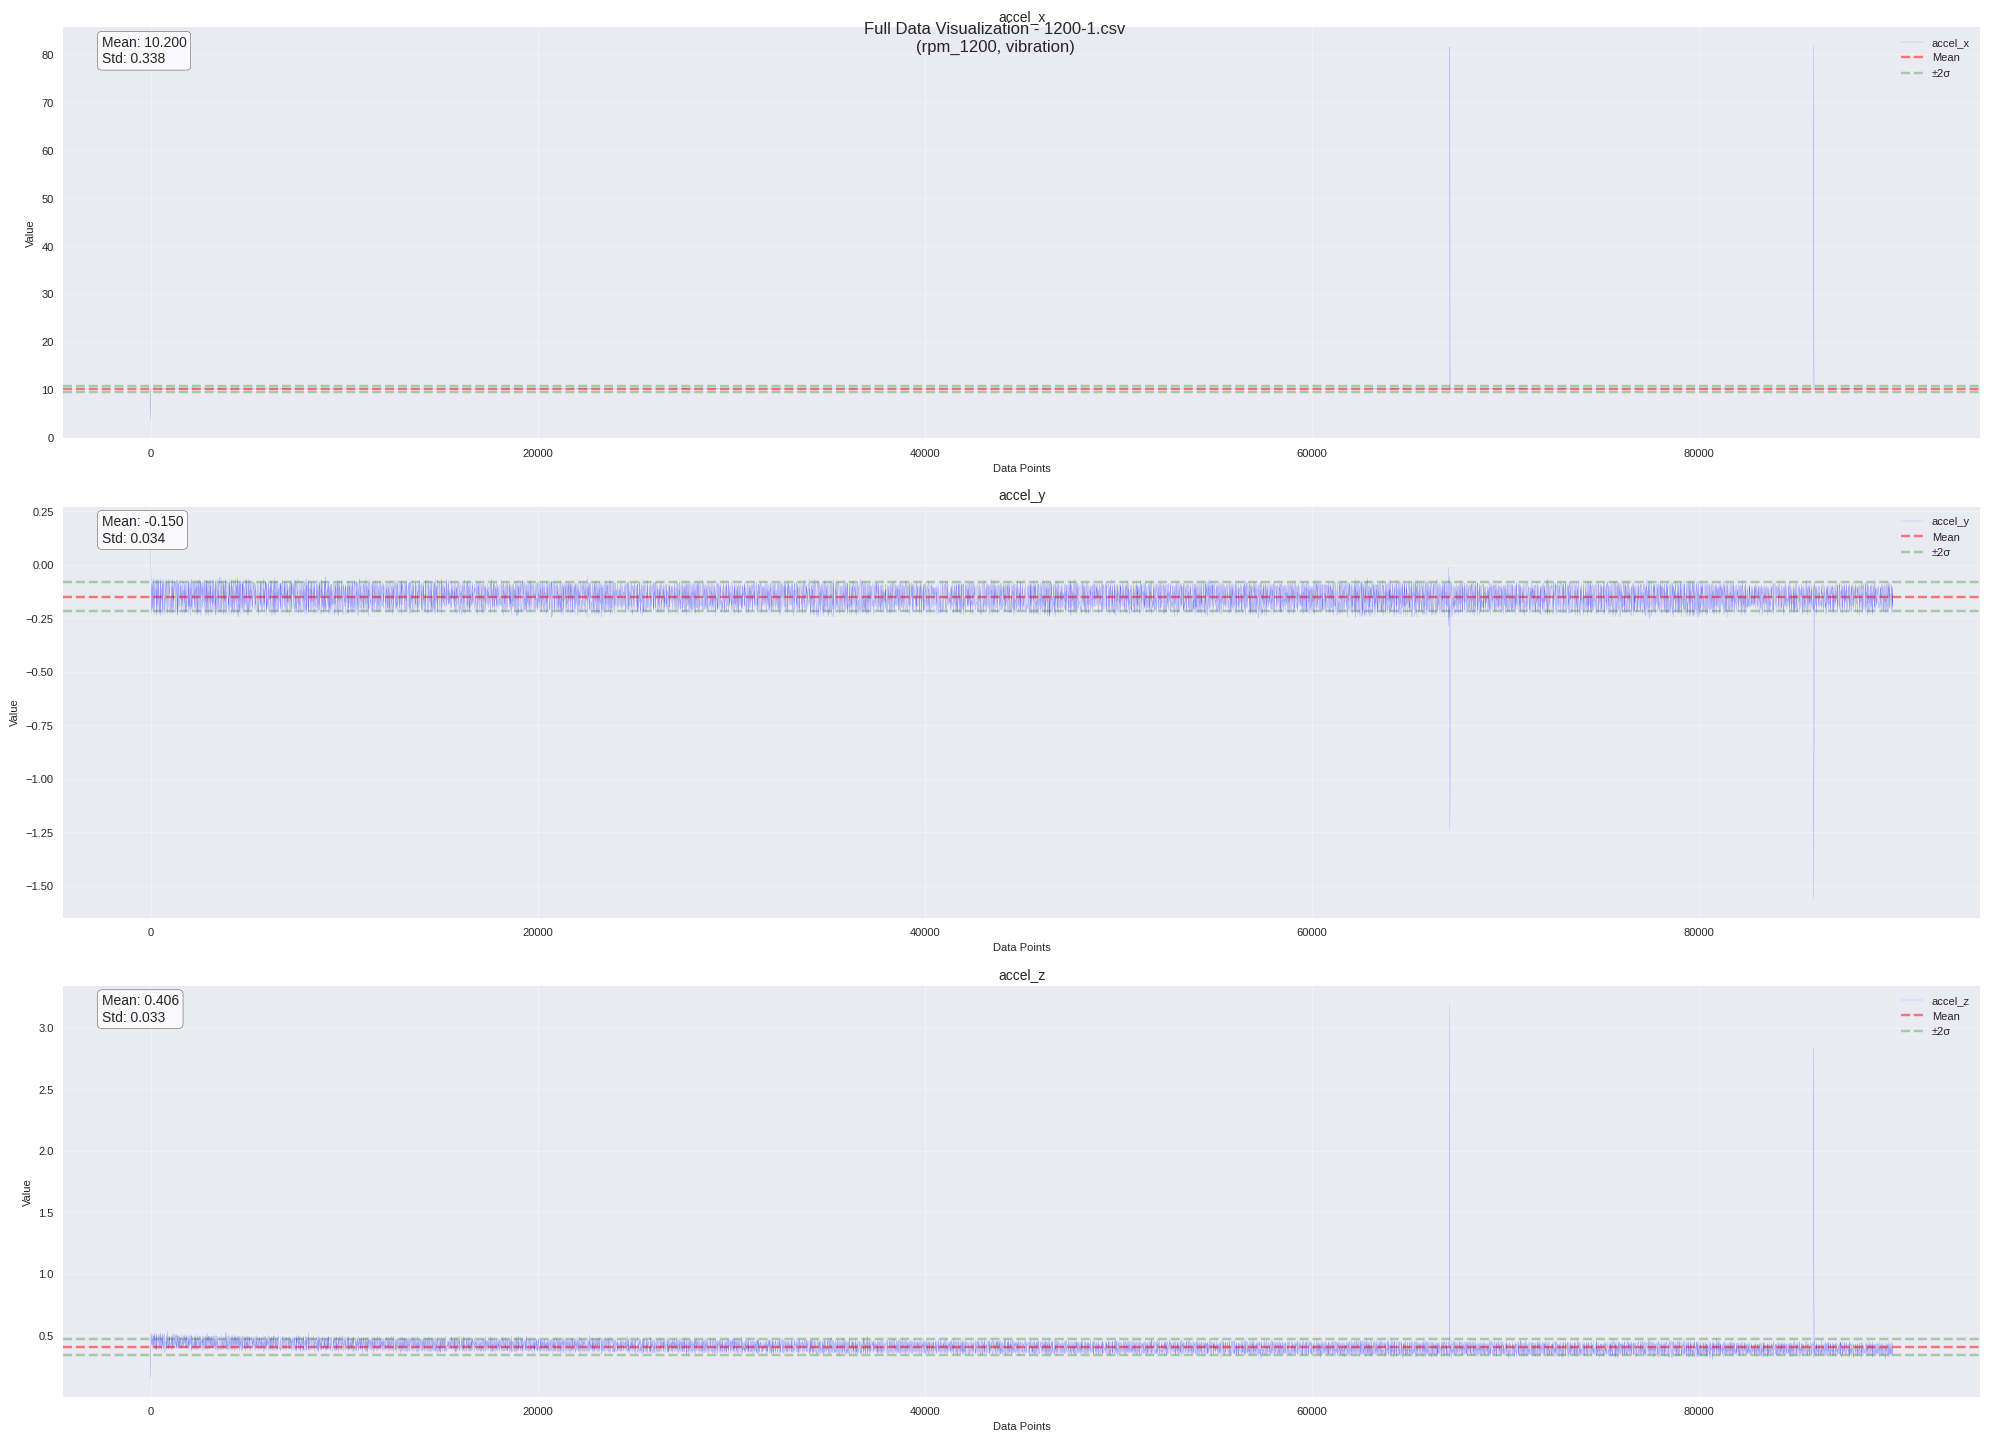

In [34]:
visualize_full_data_optimized('rpm_1200', 'vibration')

# 3. 노이즈 제거 데이터 시각화


처리 중인 파일: cleaned_1200-3.csv
데이터 포인트 수: 90001


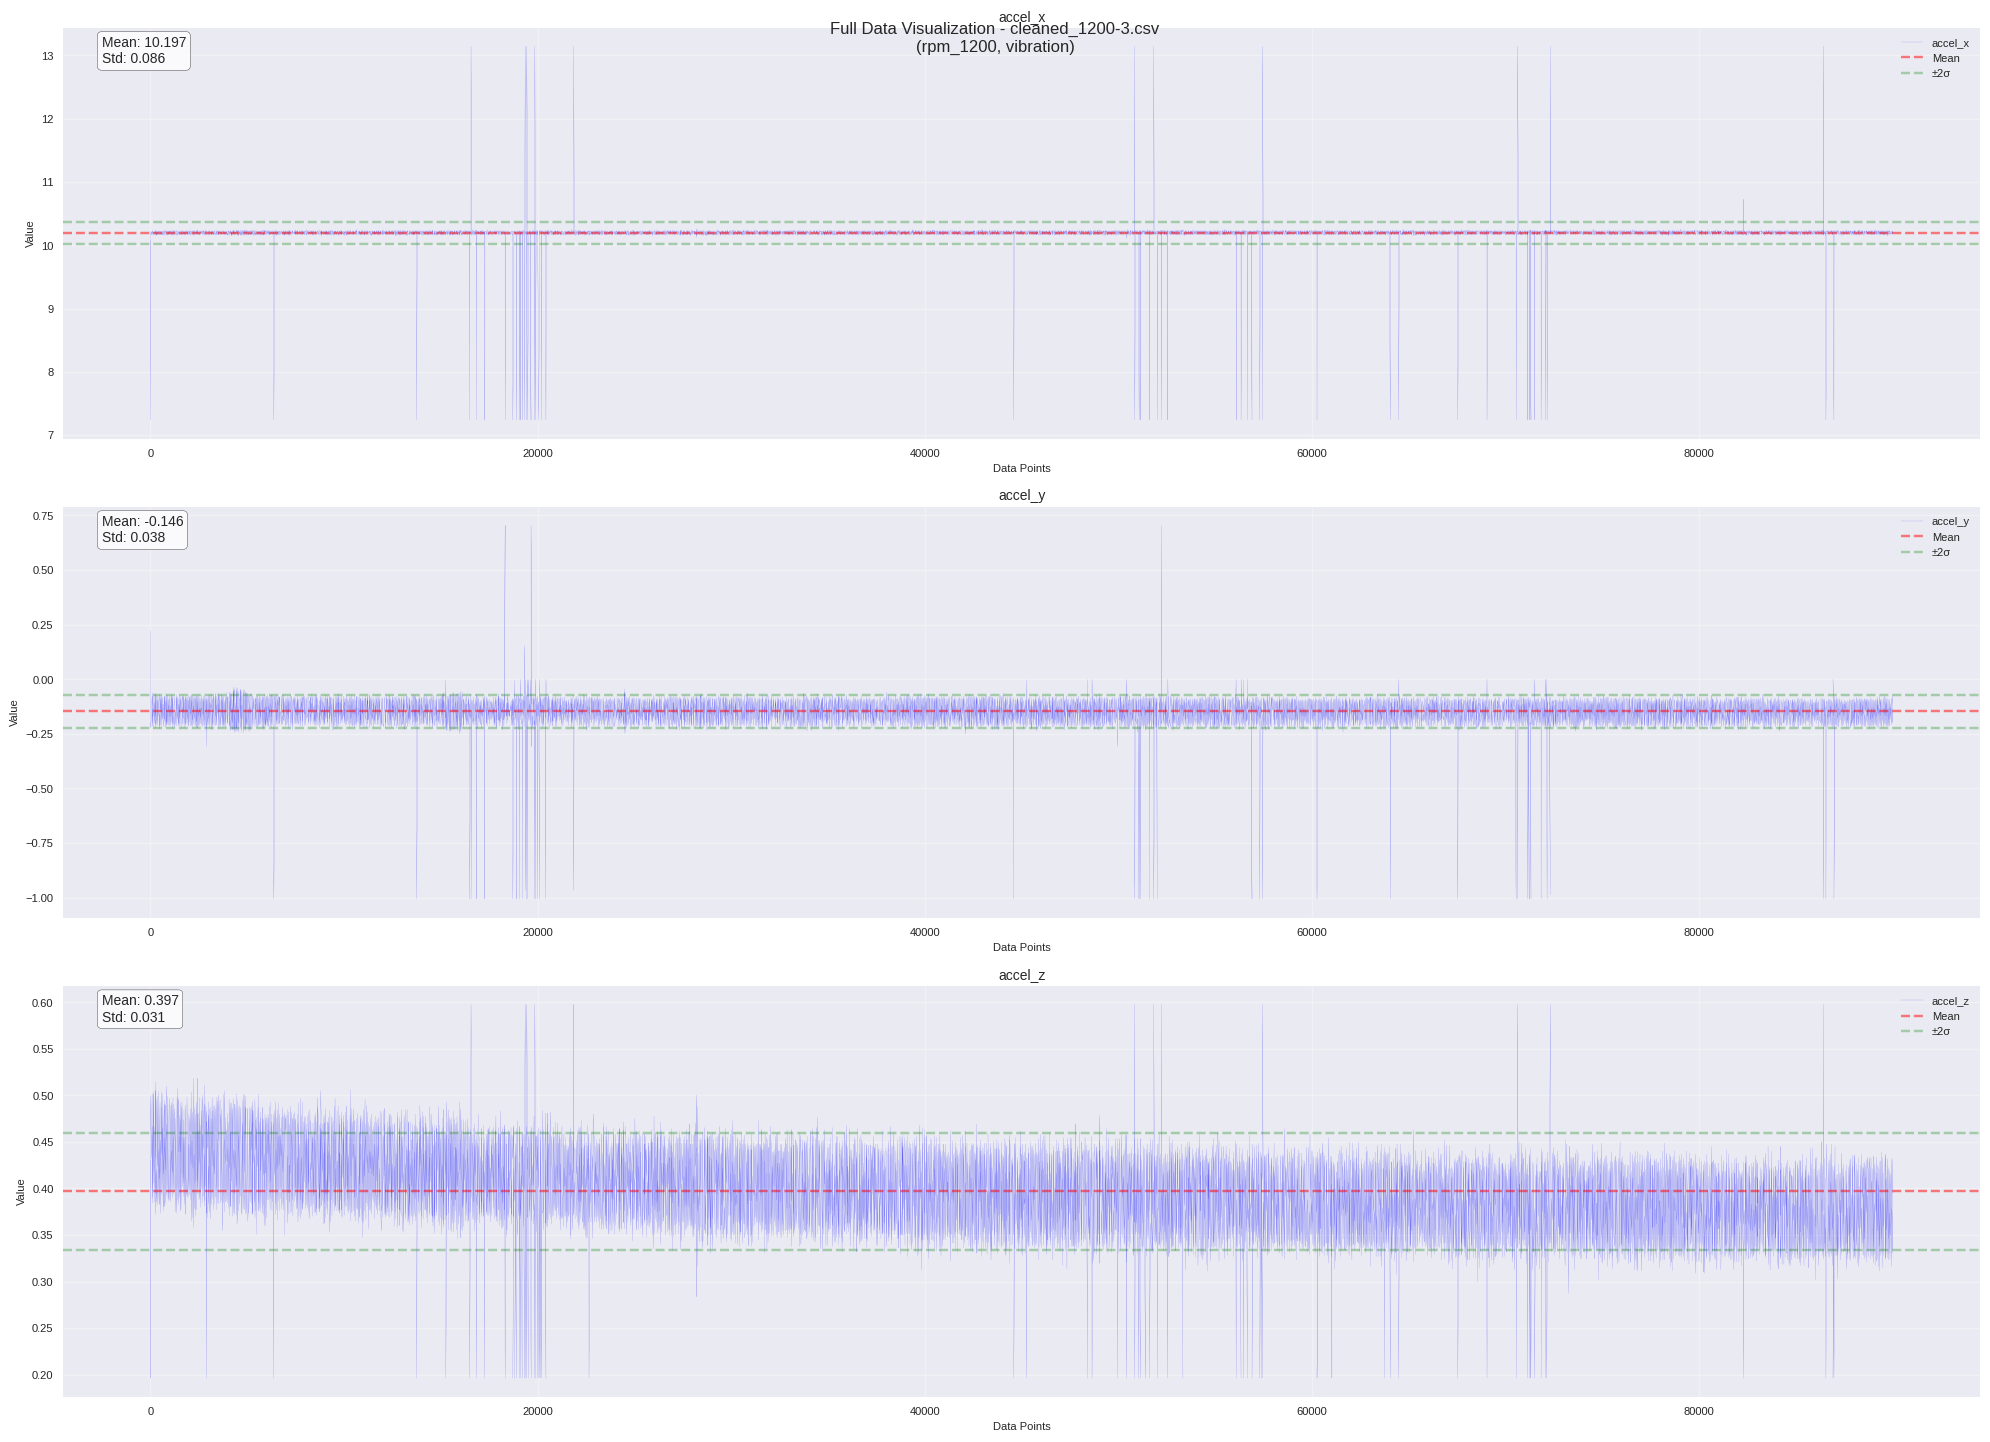


처리 중인 파일: cleaned_1200-1.csv
데이터 포인트 수: 90001


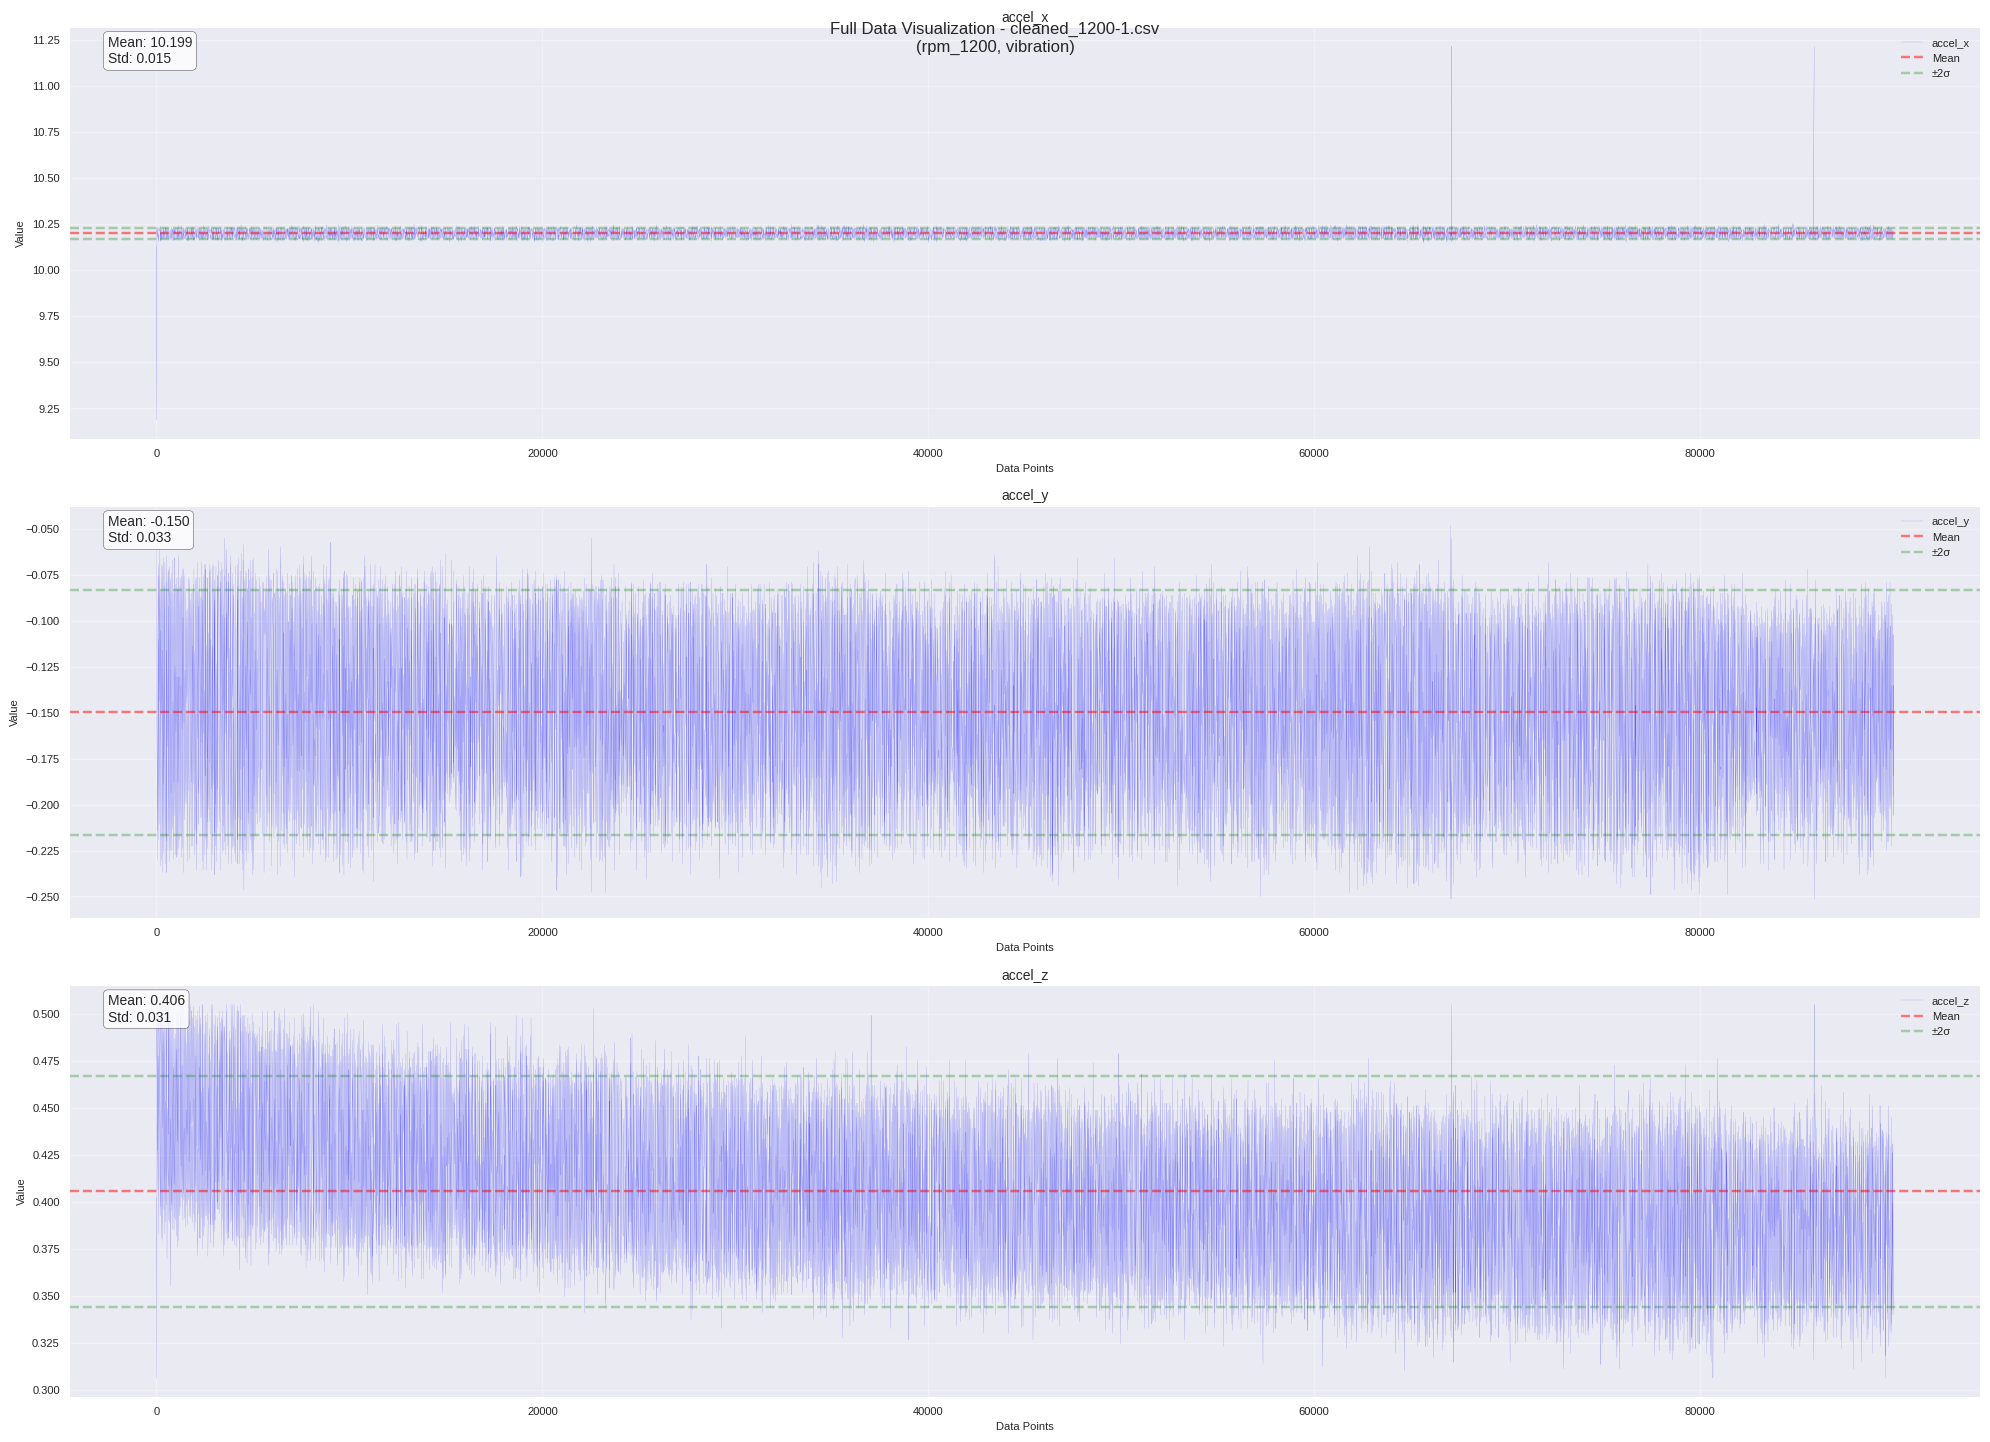

In [35]:
visualize_full_cleaned_data_optimized('rpm_1200', 'vibration')

# 4. 이상치 데이터 시각화


처리 중인 파일: cleaned_1200-3.csv
데이터 포인트 수: 90001


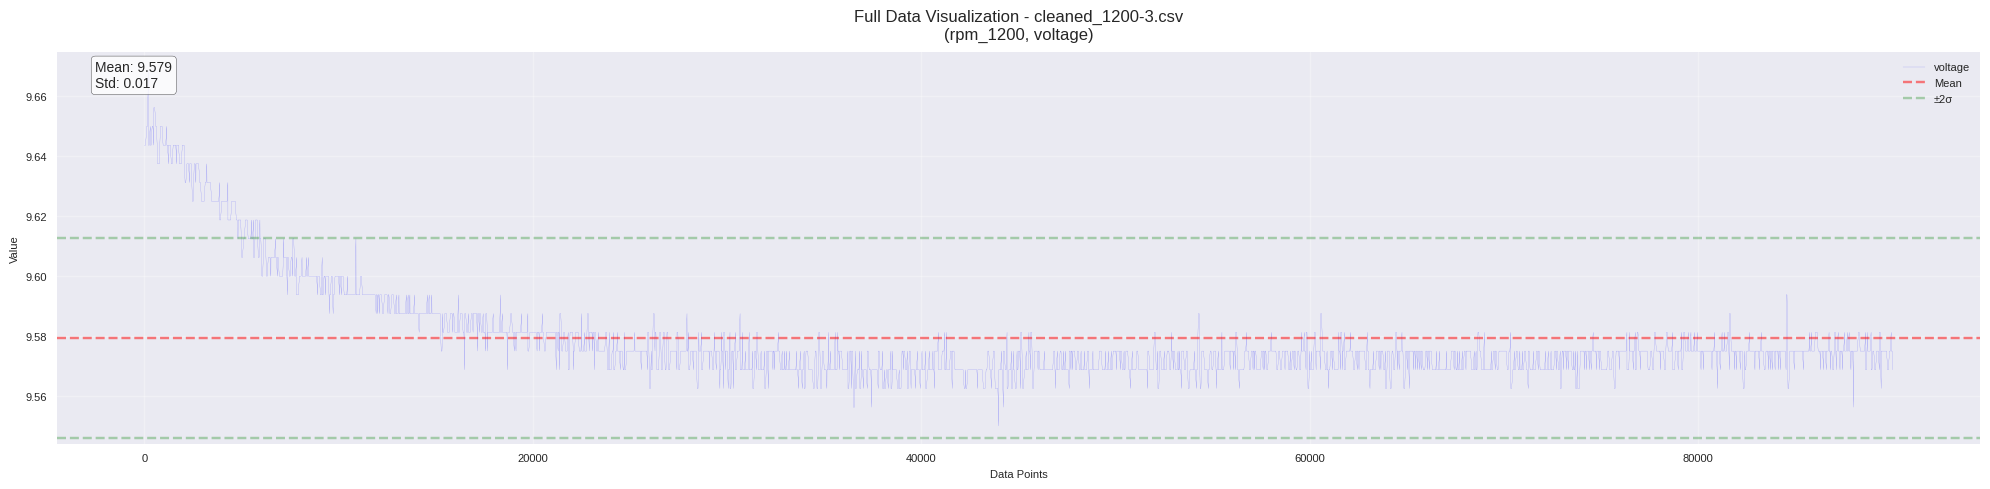


처리 중인 파일: cleaned_1200-1.csv
데이터 포인트 수: 90001


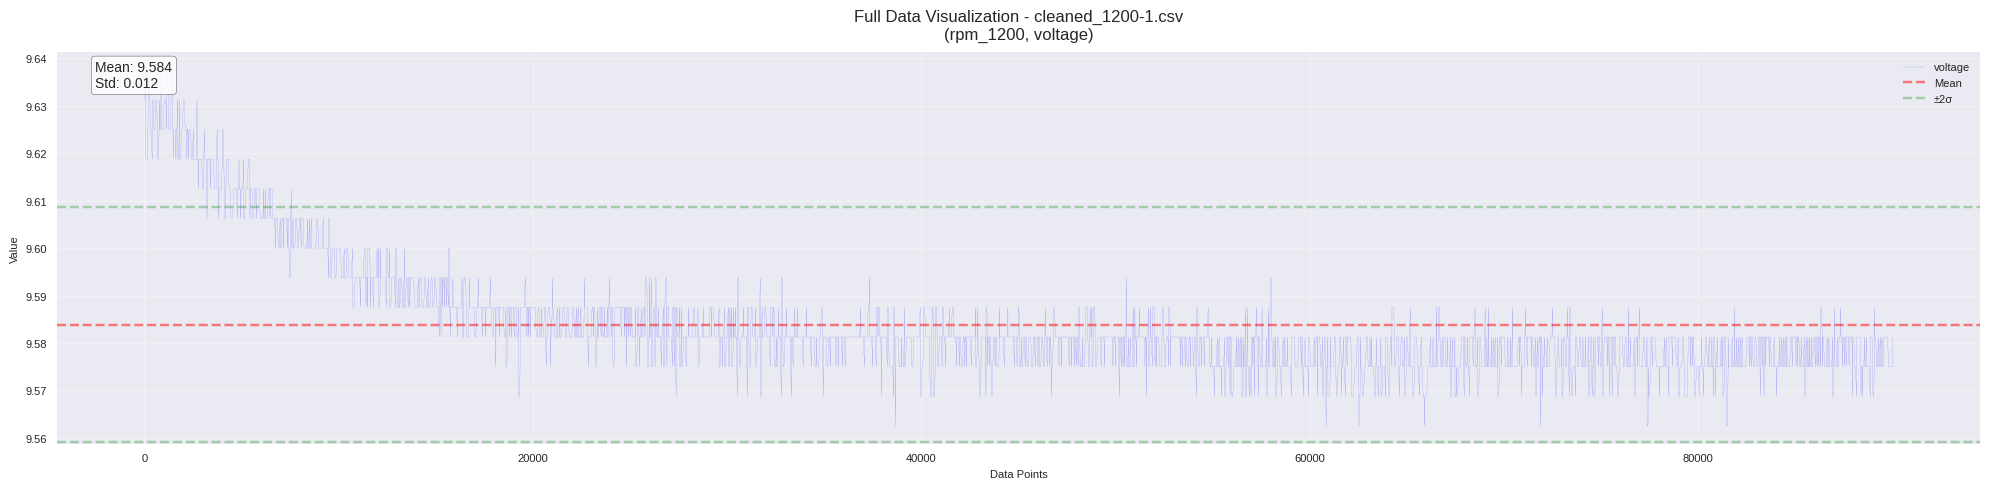

In [43]:
visualize_full_cleaned_data_optimized('rpm_1200', 'voltage', 'anomalous')